In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 1. Cargar los datos
hogar = pd.read_pickle('./data/HOGAR.pkl')
persona = pd.read_pickle('./data/PERSONA.pkl')
viajes = pd.read_pickle('./data/VIAJES_LAB.pkl')

# 2. Unir tablas
df = viajes.merge(persona, left_on=['Folio', 'ordenpersona'], right_on=['Folio', 'ordenpersona'], suffixes=('', '_pers'))
df = df.merge(hogar, on='Folio', suffixes=('', '_hog'))

# 3. Seleccionar columnas relevantes para features y target
features = [
    # Variables del hogar
    'DireccionComuna',
    # 'TamanoFamiliar', 'Estrato',
    # Variables de la persona,
    'MesNacimiento', 'TramoIngresoHogar', 'IngresoMod',
    'VisionBicicleta', 'DisponibilidadVehiculo', 'NumeroVehiculos'
    # , 'Tamaño Hogar'
    # Variables del viaje
    'Sexo', 'Rango Edad (1-16)'
    'Proposito', # Cambia por el nombre real si es distinto, a veces es 'Proposito' o 'Proposito_e'
    'OrigenActividadComuna', 'DestinoActividadComuna',
    'CuadrasCaminadasDespues', 'MinutosCaminadosDespues',
    'Zona_OrigenViaje', 'Zona_DestinoViaje',
    'HoraSalida', 'HoraLlegada', 'TiempoViaje', 'HoraMediaViaje',
    'Distancia', 'Periodo', 'NumeroEtapasViaje'
    # , 'Distancia Viaje', 'Ingreso Familiar Neto'
]

top_ten_features = [
    "Distancia",
    "MinutosCaminadosDespues",
    "CuadrasCaminadasDespues",
    "Zona_DestinoViaje",
    "Zona_OrigenViaje",
    "IngresoMod",
    "NumeroEtapasViaje",
    "HoraMediaViaje",
    "DisponibilidadVehiculo",
    "MesNacimiento"
]

target = 'Modo Viaje'  # Cambia por el nombre correcto si es diferente, como 'ModoAgregado' o 'ModoEtapa1'

# 4. Limpiar y reducir dataset
# Dejar solo las columnas existentes (algunas pueden no estar según la encuesta)
cols_existentes = [col for col in features if col in df.columns]
print(cols_existentes)
X = df[cols_existentes].copy()
y = df[target].copy()

# 5. Preprocesar variables categóricas (one-hot para categorías)
X = pd.get_dummies(X, drop_first=True)

# 6. Separar en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 7. Entrenar modelo básico
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 8. Evaluar
y_pred = clf.predict(X_test)
print("Reporte de clasificación:\n")
print(classification_report(y_test, y_pred))

# (Opcional) Importancia de features
importances = pd.Series(clf.feature_importances_, index=X.columns)
print("Variables más importantes:\n")
print(importances.sort_values(ascending=False).head(10))


['DireccionComuna', 'MesNacimiento', 'TramoIngresoHogar', 'IngresoMod', 'VisionBicicleta', 'DisponibilidadVehiculo', 'OrigenActividadComuna', 'CuadrasCaminadasDespues', 'MinutosCaminadosDespues', 'Zona_OrigenViaje', 'Zona_DestinoViaje', 'HoraSalida', 'HoraLlegada', 'TiempoViaje', 'HoraMediaViaje', 'Distancia', 'Periodo', 'NumeroEtapasViaje']
Reporte de clasificación:

              precision    recall  f1-score   support

         1.0       0.93      0.97      0.95      2045
         2.0       0.82      0.18      0.29       159
         3.0       0.77      0.88      0.82      1973
         4.0       0.79      0.88      0.84      2732
         5.0       0.73      0.37      0.49       393
         6.0       0.00      0.00      0.00        19
         7.0       0.81      0.46      0.59       734
         8.0       0.86      0.99      0.92       302
         9.0       1.00      0.06      0.11        53
        10.0       0.83      0.17      0.28        30

    accuracy                     

c:\Users\Asus\Dev\mocho\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\Dev\mocho\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\Dev\mocho\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


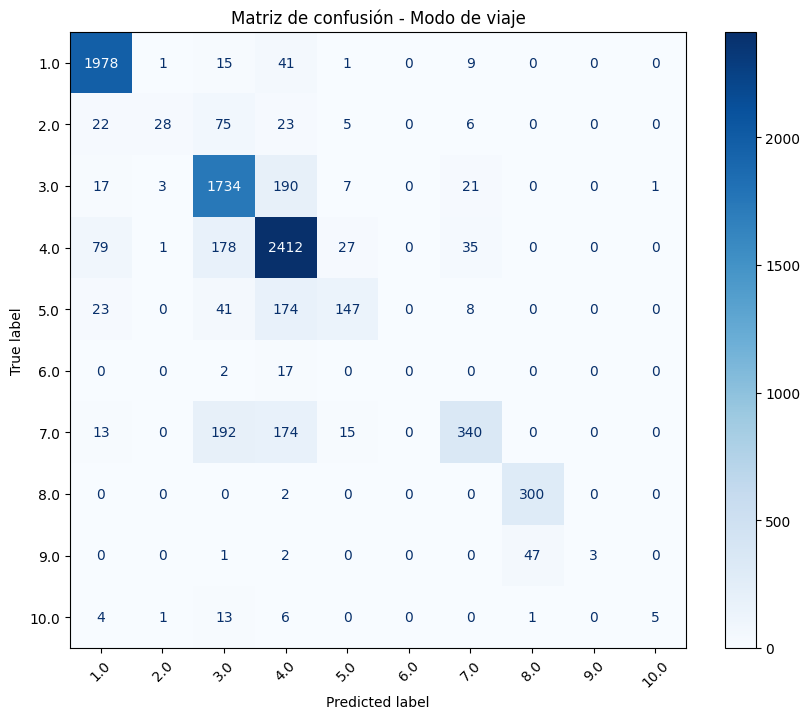

Matriz de confusión:

Accuracy: 0.8231
Precision (macro): 0.7548


In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
labels = sorted(y.unique())  # Ordenar los modos por su valor numérico
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
plt.title("Matriz de confusión - Modo de viaje")
plt.show()
print("Matriz de confusión:\n")

# Calcular y mostrar accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calcular y mostrar precision macro (promedio entre clases)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
print(f"Precision (macro): {precision:.4f}")